In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [8]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [9]:
img_count = len(list(data_dir.glob('*/*.jpg')))
print(img_count)

3670


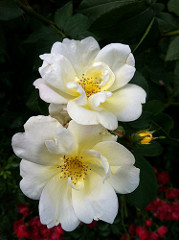

In [10]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))


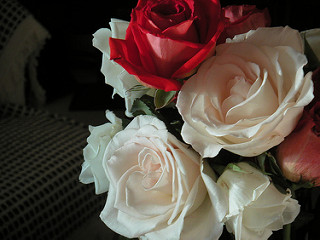

In [11]:
PIL.Image.open(str(roses[1]))

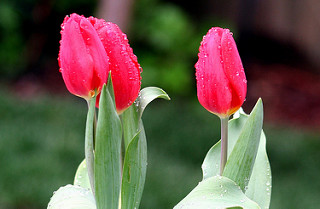

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

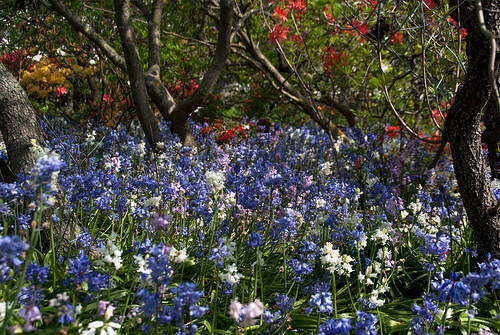

In [13]:
PIL.Image.open(str(tulips[1]))

In [14]:
batch_size = 32
img_height = 180
img_width = 180

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation",seed=123,image_size=(img_height,img_width), batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


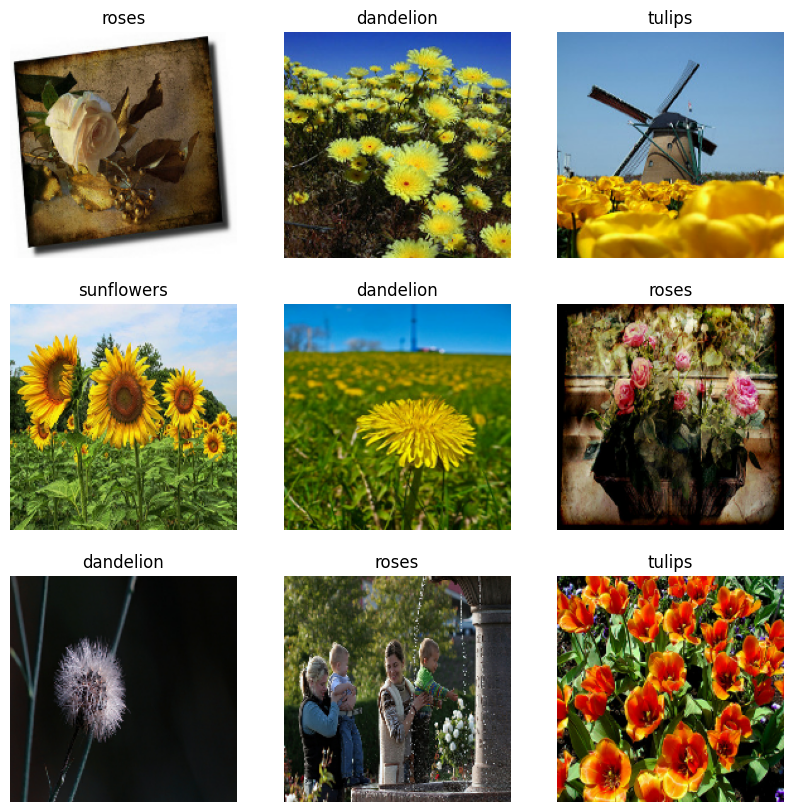

In [18]:
from matplotlib.pyplot import subplot


plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
hold_image = image_batch.numpy()
hold_label = labels_batch.numpy()
print(hold_image)
print(hold_label) 

(32, 180, 180, 3)
(32,)
[[[[8.83888855e+01 1.24388885e+02 2.00388885e+02]
   [8.89277802e+01 1.24927780e+02 2.00927780e+02]
   [8.88342590e+01 1.25369446e+02 1.99212967e+02]
   ...
   [2.14580017e+02 8.65392227e+01 2.93608099e-01]
   [2.33405533e+02 1.02674973e+02 5.17222071e+00]
   [2.28703690e+02 9.76851730e+01 2.50831127e+00]]

  [[9.02777786e+01 1.26277779e+02 2.02277786e+02]
   [9.08666611e+01 1.27150002e+02 2.03008331e+02]
   [9.50527802e+01 1.33036102e+02 2.06155548e+02]
   ...
   [1.61444641e+02 6.94110336e+01 9.16383362e+00]
   [1.72708313e+02 6.47249908e+01 1.37494326e+00]
   [1.53869415e+02 6.37055588e+01 4.15557909e+00]]

  [[9.30277786e+01 1.31027786e+02 2.06027786e+02]
   [9.27500000e+01 1.30819443e+02 2.05819443e+02]
   [9.83518524e+01 1.37162033e+02 2.09879623e+02]
   ...
   [1.18514069e+02 5.96759567e+01 8.26373959e+00]
   [1.67694916e+02 1.02569954e+02 4.29171982e+01]
   [2.26222305e+02 1.90916809e+02 1.68245605e+02]]

  ...

  [[8.00000458e+01 1.02430565e+02 3.508800

In [20]:
from tensorflow._api.v2.data import AUTOTUNE


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
#normalisation_layer = layers.Rescaling(1./255)

In [22]:
#normalised_ds = train_ds.map(lambda x, y: (normalisation_layer(x), y))
#image_batch, labels_batch = next(iter(normalised_ds))
#first_image = image_batch[0]
#print(np.min(first_image), np.max(first_image))

In [23]:
num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

In [24]:
from tensorflow.python.training.saver import metrics


model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [26]:
epochs = 15
history = model.fit (train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
92/92 [==============================] - 31s 286ms/step - loss: 1.2954 - accuracy: 0.4319 - val_loss: 1.1457 - val_accuracy: 0.5272
Epoch 2/15
92/92 [==============================] - 24s 265ms/step - loss: 0.9720 - accuracy: 0.6148 - val_loss: 0.9256 - val_accuracy: 0.6349
Epoch 3/15
92/92 [==============================] - 25s 267ms/step - loss: 0.7747 - accuracy: 0.7142 - val_loss: 0.9005 - val_accuracy: 0.6526
Epoch 4/15
92/92 [==============================] - 27s 293ms/step - loss: 0.5596 - accuracy: 0.7960 - val_loss: 0.9153 - val_accuracy: 0.6689
Epoch 5/15
92/92 [==============================] - 27s 298ms/step - loss: 0.3677 - accuracy: 0.8709 - val_loss: 1.1730 - val_accuracy: 0.6403
Epoch 6/15
92/92 [==============================] - 28s 307ms/step - loss: 0.2144 - accuracy: 0.9305 - val_loss: 1.4282 - val_accuracy: 0.6226
Epoch 7/15
92/92 [==============================] - 29s 313ms/step - loss: 0.1172 - accuracy: 0.9666 - val_loss: 1.5255 - val_accuracy: 0.6403

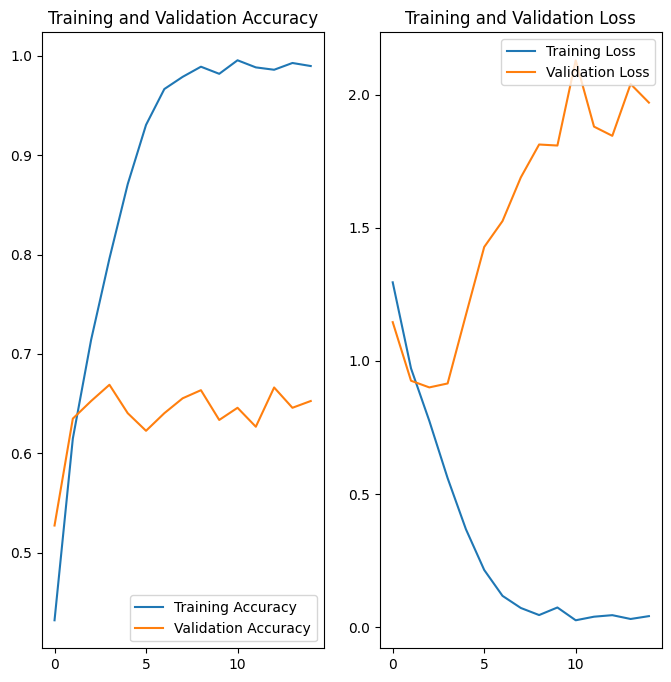

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

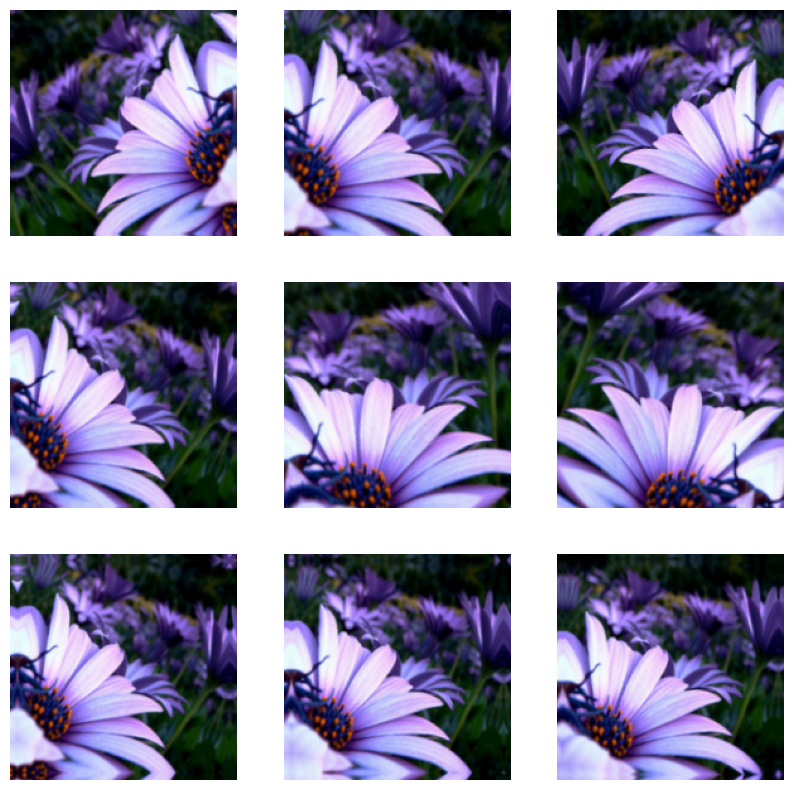

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [30]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [33]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 41s 425ms/step - loss: 1.2822 - accuracy: 0.4595 - val_loss: 1.1063 - val_accuracy: 0.5463
Epoch 2/15
92/92 [==============================] - 40s 433ms/step - loss: 1.0232 - accuracy: 0.5998 - val_loss: 1.1135 - val_accuracy: 0.5599
Epoch 3/15
92/92 [==============================] - 48s 526ms/step - loss: 0.9219 - accuracy: 0.6458 - val_loss: 0.8856 - val_accuracy: 0.6594
Epoch 4/15
92/92 [==============================] - 47s 507ms/step - loss: 0.8575 - accuracy: 0.6730 - val_loss: 0.8444 - val_accuracy: 0.6635
Epoch 5/15
92/92 [==============================] - 45s 493ms/step - loss: 0.8138 - accuracy: 0.6822 - val_loss: 0.8618 - val_accuracy: 0.6553
Epoch 6/15
92/92 [==============================] - 47s 508ms/step - loss: 0.7727 - accuracy: 0.7013 - val_loss: 0.7747 - val_accuracy: 0.7044
Epoch 7/15
92/92 [==============================] - 43s 473ms/step - loss: 0.7327 - accuracy: 0.7255 - val_loss: 0.8095 - val_accuracy: 0.6894

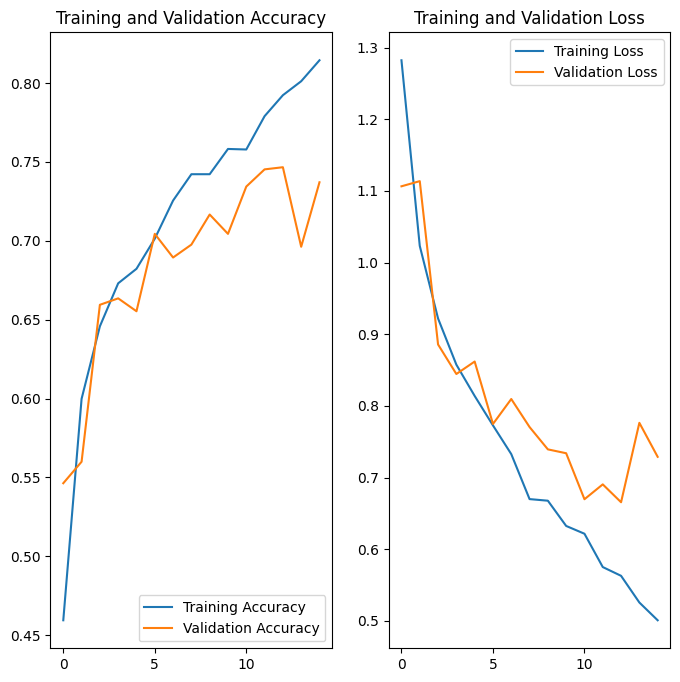

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 100ms/step
This image most likely belongs to sunflowers with a 89.70 percent confidence.


In [36]:
from pathlib import Path
output = Path.cwd() / "saved_models" / "Sequential"
model.save(output)

W1221 14:42:41.487213 12544 save.py:233] Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: c:\Users\joshu\OneDrive\Documents\Uni\COMP4092\COMP4092_FAIMS_Thesis_MML\Project\Demo\saved_models\Sequential\assets


I1221 14:42:42.058800 12544 builder_impl.py:779] Assets written to: c:\Users\joshu\OneDrive\Documents\Uni\COMP4092\COMP4092_FAIMS_Thesis_MML\Project\Demo\saved_models\Sequential\assets


In [37]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model,  Path.cwd() / "saved_models" / "Sequential_layers")

In [38]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_seq_model = converter.convert()

with open('saved_models/tfLite_sequential.tflite', 'wb') as f:
    f.write(tflite_seq_model)

W1221 14:42:44.868170 12544 save.py:233] Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: C:\Users\joshu\AppData\Local\Temp\tmpn5zlgza4\assets


I1221 14:42:45.339975 12544 builder_impl.py:779] Assets written to: C:\Users\joshu\AppData\Local\Temp\tmpn5zlgza4\assets


In [39]:
TFLITE_MODEL_FILE_PATH = 'saved_models/tfLite_sequential.tflite'

model_interpreter = tf.lite.Interpreter(model_path= TFLITE_MODEL_FILE_PATH)

model_interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [40]:
tfLite_classify_test = model_interpreter.get_signature_runner('serving_default')
tfLite_classify_test

In [41]:
tfLite_predictions = tfLite_classify_test(sequential_1_input=img_array)['outputs']
tfLite_score = tf.nn.softmax(tfLite_predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(tfLite_score)], 100 * np.max(tfLite_score))
)

print(np.max(np.abs(predictions - tfLite_predictions)))

This image most likely belongs to sunflowers with a 89.70 percent confidence.
3.33786e-06


In [42]:
tf.lite.experimental.Analyzer.analyze(model_path='tfLite_sequential.tflite')

=== tfLite_sequential.tflite ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the CONV_2D op takes
tensor #0 and tensor #11 and tensor #5 as input and produces tensor #12 as output.

Subgraph#0 main(T#0) -> [T#20]
  Op#0 CONV_2D(T#0, T#11, T#5) -> [T#12]
  Op#1 MAX_POOL_2D(T#12) -> [T#13]
  Op#2 CONV_2D(T#13, T#9, T#4) -> [T#14]
  Op#3 MAX_POOL_2D(T#14) -> [T#15]
  Op#4 CONV_2D(T#15, T#10, T#3) -> [T#16]
  Op#5 MAX_POOL_2D(T#16) -> [T#17]
  Op#6 RESHAPE(T#17, T#6) -> [T#18]
  Op#7 FULLY_CONNECTED(T#18, T#7, T#2) -> [T#19]
  Op#8 FULLY_CONNECTED(T#19, T#8, T#1) -> [T#20]

Tensors of Subgraph#0
  T#0(serving_default_sequential_1_input:0) shape_signature:[-1, 180, 180, 3], type:FLOAT32
  T#1(sequential_2/outputs/BiasAdd/ReadVariableOp) shape:[5], type:FLOAT32 RO 20 bytes
  T#2(sequential_2/dense_2/BiasAdd/ReadVariableOp) shape:[128], type:FLOAT32 RO 512 bytes
  T#3(sequential_2/conv2d_5/BiasAdd/Rea